**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [4]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [5]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
print(type(train_images))
print(train_images.shape)
print(train_images[251].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [10]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)

784
(60000, 784)


#convert data to float and scale values between 0 and 1

In [11]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

In [12]:
train_data /=255.0
test_data /=255.0

change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [13]:
train_labels_one_hot = to_categorical(train_labels)


test_labels_one_hot = to_categorical(test_labels)

In [14]:
print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#creating network

In [15]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model

In [18]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=0)

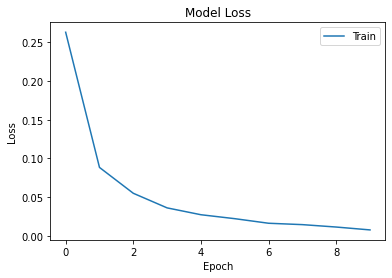

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

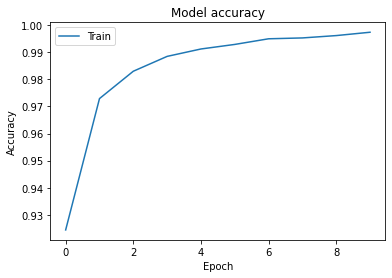

In [25]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

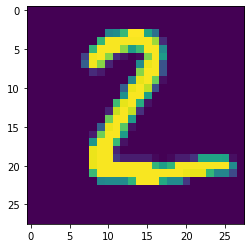

In [28]:
# plt.imshow(test_data[0].reshape([28,28])) # test_images.reshape(test_images.shape[0],dimData)
plt.imshow(test_images[1])

In [29]:
res = model.predict(test_data[1:2])

In [33]:
# print(res)
print(res.argmax()) # Returns the indices of the maximum values along an axis.

2
